# Visualization Notebook


In this notebook, the user can interact with trained models from the paper EpidemiOptim: A Toolbox for the Optimization of Control Policies in Epidemiological Models.


In [1]:
%matplotlib notebook
import sys
sys.path.append('../../')
from epidemioptim.analysis.notebook_utils import setup_visualization
from epidemioptim.utils import get_repo_path

Pick your parameters: seed, algorithm and epidemiological model determinism. Currently implemented:

### DQN

The user can control the mixing parameter $\beta$ that tunes the balance between economic $(C_e)$ and health $(C_h)$ costs: $C=(1-\beta)~C_h + \beta~C_e$. When it does so, the corresponding DQN policy is loaded and run in the model for one year. The user can then visualize the evolution of costs over a year. Lockdown enforcement are marked by red dots.


### GOAL_DQN

The user can control the mixing parameter $\beta$. There is only one policy. For each $\beta$, the optimal actions are selected according to the corresponding balance between Q-functions: $a^* = \text{argmax}_a (1-\beta)~Q_h + \beta~Q_e$. Each time $\beta$ is changed, the model is run over a year.


### GOAL_DQN_CONSTRAINTS

The user can control $\beta$ and the values of constraints on the maximum values of cumulative costs ($M_e$, $M_h$). Each time new parameters are selected, the resulting policy is run in the model over a year. 


### NSGA

The user can observe the Pareto front produced by a run of the NSGA-II algorithm. When clicking on a solution from the Pareto front, the corresponding policy is loaded and run in the model over a year. 




In [2]:
seed = None  # None picks a random seed
algorithm = 'DQN'  # Pick from ['DQN', 'GOAL_DQN_CONSTRAINTS', 'GOAL_DQN', 'NSGA']
deterministic_model = False  # whether the model is deterministic or not

The cell below launches the visualization.

Replaying:  /home/flowers/Desktop/Scratch/covidRL//data/data_for_visualization/DQN/0.5/


<IPython.core.display.Javascript object>


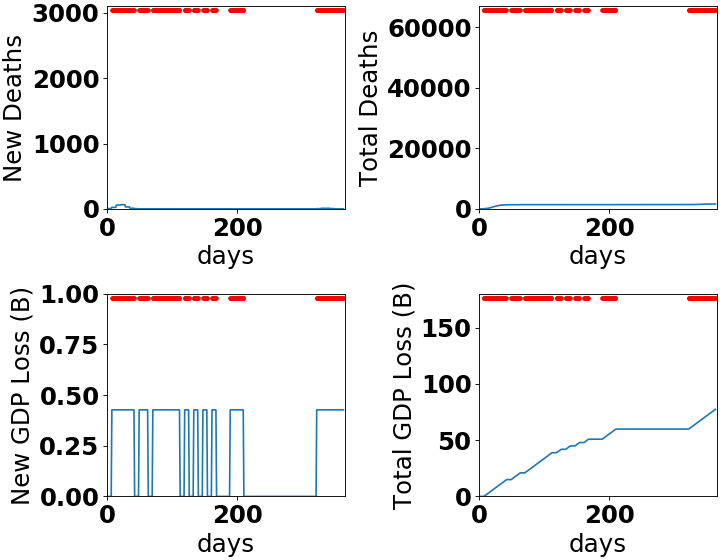

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, step=0.05), Output()), _dom_classes=…

In [3]:
valid_algorithms = ['DQN', 'GOAL_DQN_CONSTRAINTS', 'GOAL_DQN', 'NSGA']
assert algorithm in valid_algorithms, "Pick an algorithm from" + str(valid_algorithms)

if algorithm == 'DQN':
    folder = get_repo_path() + "/data/data_for_visualization/DQN/"
elif algorithm == 'GOAL_DQN':
    folder = get_repo_path() + "/data/data_for_visualization/GOAL_DQN/1/"
elif algorithm == 'GOAL_DQN_CONSTRAINTS':
    folder = get_repo_path() + "/data/data_for_visualization/GOAL_DQN_CONST/1/"
elif algorithm == 'NSGA':
    folder = get_repo_path() + "/data/data_for_visualization/NSGA/1/"
else:
    raise NotImplementedError
    
setup_visualization(folder, algorithm, seed, deterministic_model)